### Import libraries

In [1]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from bs4 import BeautifulSoup
from wordcloud import WordCloud

### Connect to data source and web scrape

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


### View dataframe

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews 
df.head()

,reviews
0,✅ Trip Verified | Organised boarding process. ...
1,✅ Trip Verified | Outward journey BA245 Londo...
2,✅ Trip Verified | Check in agent at LHR was ve...
3,✅ Trip Verified | Very disappointing. I book ...
4,✅ Trip Verified | Excellent service both on th...


### Check number of rows and columns

In [4]:
df.shape

(1000, 1)

### Data profiling

In [5]:
df.describe()

,reviews
count,1000
unique,1000
top,✅ Trip Verified | BA836 on 19 Jan. Excellent ...
freq,1


### Split data 

In [6]:
df[['Topic', 'Reviews']] = df.reviews.str.split("|", expand = True) 

In [7]:
df.head()

,reviews,Topic,Reviews
0,✅ Trip Verified | Organised boarding process. ...,✅ Trip Verified,Organised boarding process. Really friendly c...
1,✅ Trip Verified | Outward journey BA245 Londo...,✅ Trip Verified,Outward journey BA245 London to Buenos Aires...
2,✅ Trip Verified | Check in agent at LHR was ve...,✅ Trip Verified,Check in agent at LHR was very helpful and fr...
3,✅ Trip Verified | Very disappointing. I book ...,✅ Trip Verified,Very disappointing. I book BA so I can fly d...
4,✅ Trip Verified | Excellent service both on th...,✅ Trip Verified,Excellent service both on the ground and on b...


### Convert to csv

In [8]:
df.to_csv("C:/Users/Akunna Anyamkpa/Downloads/British Airways/BA_reviews1.csv")

### Drop column

In [9]:
df.drop(['reviews'], axis=1, inplace=True)

In [10]:
df.head()

,Topic,Reviews
0,✅ Trip Verified,Organised boarding process. Really friendly c...
1,✅ Trip Verified,Outward journey BA245 London to Buenos Aires...
2,✅ Trip Verified,Check in agent at LHR was very helpful and fr...
3,✅ Trip Verified,Very disappointing. I book BA so I can fly d...
4,✅ Trip Verified,Excellent service both on the ground and on b...


### Check dataframe info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Topic    1000 non-null   object
 1   Reviews  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


### Use word cloud to check the predominant review

In [12]:
text = " ".join(Reviews for Reviews in df.Reviews)

In [13]:
# Creating word_cloud with text as argument in .generate() method
cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text)
# saving the image
cloud.to_file('got.png')

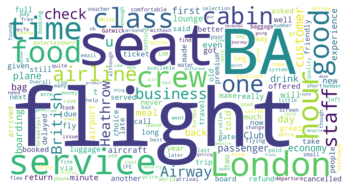

In [14]:
# Display the generated Word Cloud
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

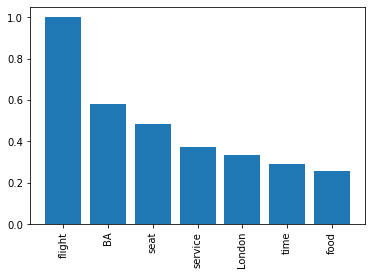

In [15]:
# Convert the word cloud to a bar chart 
N = 7
words = cloud.words_
frequencies = [words[word] for word in words]
top_words = [word for _, word in sorted(zip(frequencies, words), reverse=True)[:N]]
top_frequencies = [frequency for frequency, _ in sorted(zip(frequencies, words), reverse=True)[:N]]
x_pos = range(len(top_words))

plt.bar(x_pos, top_frequencies, align='center')
plt.xticks(x_pos, top_words, rotation=90)

plt.show()


### Use sentiment analysis to analyze the reviews

In [16]:
# Function to perform sentiment analysis on a string
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

# Apply the sentiment analysis function to each row of the data frame
df['sentiment'] = df['Reviews'].apply(sentiment_analysis)

# Get the number of positive, neutral, and negative reviews
sentiment_counts = df['sentiment'].value_counts()

# Show the results
print("\nSentiment counts:")
print(sentiment_counts)



Sentiment counts:
Positive    669
Negative    322
Neutral       9
Name: sentiment, dtype: int64


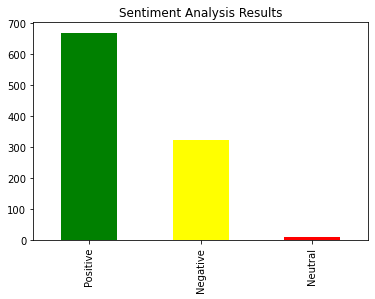

In [17]:
# Plot the sentiment counts
sentiment_counts.plot(kind='bar', color=['green', 'yellow', 'red'])

# Add labels and title to the plot
plt.title("Sentiment Analysis Results")

# Show the plot
plt.show()